In [42]:
import pandas as pd
import pymysql
import numpy as np
from sqlalchemy import create_engine

In [34]:
db = pymysql.connect(host = 'database-1.cr1v98drjdof.ap-northeast-2.rds.amazonaws.com', port = 3306, user = 'admin', password = 'lazyestate', database = 'LE')
cursor = db.cursor()


sql = """
SELECT auction_date, sale_rate FROM houseinfo_raw
"""
cursor.execute(sql)
df = cursor.fetchall()


db.close()

In [49]:
host = 'database-1.cr1v98drjdof.ap-northeast-2.rds.amazonaws.com'
port = 3306
user = 'admin'
password = 'lazyestate'
database = 'LE'

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

query = "SELECT auction_date, sale_rate FROM houseinfo_raw"

df = pd.read_sql(query, engine)


df

,auction_date,sale_rate
0,2023-08-10,110
1,2023-08-10,76
2,2023-08-10,108
3,2023-08-10,97
4,2023-08-09,78
...,...,...
968,2020-08-12,106
969,2020-08-11,106
970,2020-08-11,101
971,2020-08-11,82


In [62]:
df.sort_values(by='sale_rate')

,auction_date,sale_rate
196,2023-03-28,9
126,2023-06-07,17
202,2023-03-21,20
94,2023-06-29,26
822,2021-02-03,27
...,...,...
836,2021-01-25,177
820,2021-02-08,189
853,2020-12-02,190
680,2021-06-22,202


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   auction_date  973 non-null    datetime64[ns]
 1   sale_rate     973 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.3 KB


C:\Users\byelb\AppData\Local\Temp\ipykernel_23828\3832481575.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = df.groupby(df['auction_date'].dt.to_period('M')).mean()


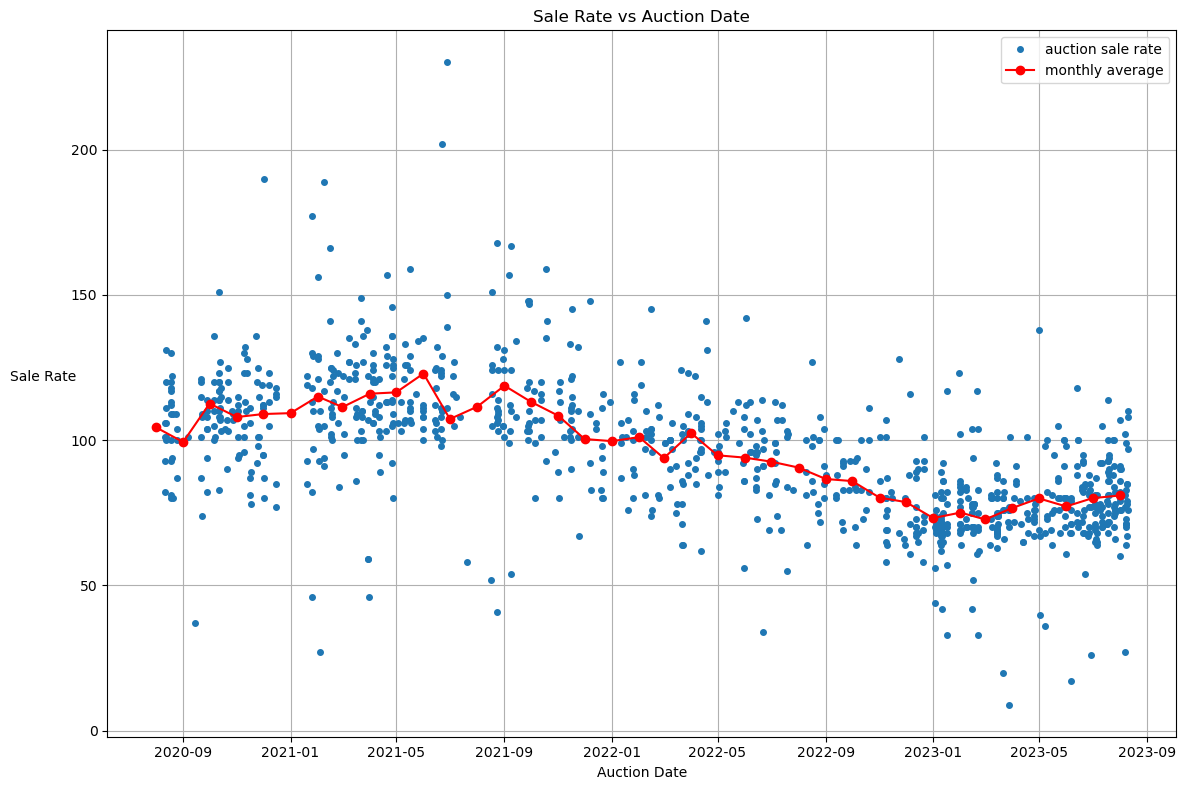

In [118]:
import matplotlib.pyplot as plt

df['auction_date'] = pd.to_datetime(df['auction_date'])
monthly_avg = df.groupby(df['auction_date'].dt.to_period('M')).mean()


plt.figure(figsize=(12, 8))
plt.plot(df['auction_date'], df['sale_rate'], marker='o', linestyle='None', markersize=4, label='auction sale rate')
plt.plot(monthly_avg.index.to_timestamp(), monthly_avg['sale_rate'], marker='o', linestyle='-', color='red', label='monthly average')

plt.legend(loc='upper right')
plt.xlabel('Auction Date')
plt.ylabel('Sale Rate', rotation=0, labelpad=20)
plt.title('Sale Rate vs Auction Date')



plt.grid(True)
plt.tight_layout()
